In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Necessary libraries and imports to complete this tutorial
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import random
from scipy.spatial import distance

# Chargement du dataset dans une DataFrame
dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# Affichage des 5 premières lignes du dataset
print(dataset_R6.head())

  platform    dateid skillrank      role       operator primaryweapon  \
0       PC  20170210    Bronze  Attacker   BOPE-CAPITAO          M249   
1       PC  20170210    Bronze  Attacker   BOPE-CAPITAO          M249   
2       PC  20170210    Bronze  Attacker   BOPE-CAPITAO      PARA-308   
3       PC  20170210    Bronze  Attacker   BOPE-CAPITAO      PARA-308   
4       PC  20170210    Bronze  Attacker  G.E.O.-JACKAL           C7E   

  secondaryweapon secondarygadget  nbwins  nbkills  nbdeaths  nbpicks  
0           PRB92        CLAYMORE       6        6         6        8  
1           PRB92    STUN GRENADE       4        2         6        8  
2           PRB92        CLAYMORE      37       40        49       70  
3           PRB92    STUN GRENADE      17       24        31       41  
4          ITA12S   BREACH CHARGE      74      123       127      174  


#### KPPV sur les données de base

    nbwins  nbkills  nbdeaths  nbpicks
0        6        6         6        8
1        4        2         6        8
2       37       40        49       70
3       17       24        31       41
4       74      123       127      174
..     ...      ...       ...      ...
95      31       61        64       85
96       4        5        10       12
97      17       39        51       61
98       6       11        13       17
99      76      115       137      175

[100 rows x 4 columns]


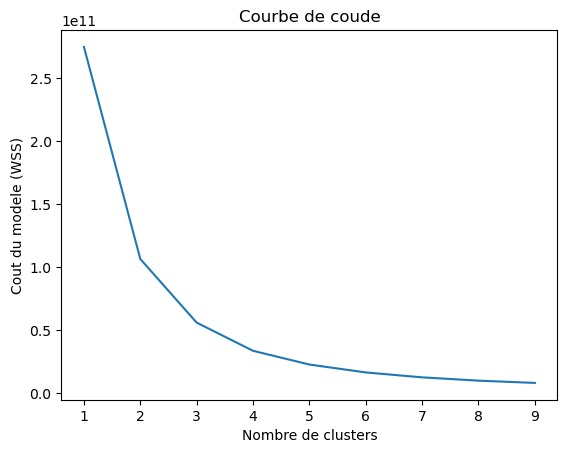

In [2]:
from sklearn.cluster import KMeans

#data_test = dataset_R6.groupby(['nbwins','nbkills', 'nbdeaths', 'nbpicks'], as_index=False)
dataset_test = dataset_R6.copy()
dataset_test.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget','platform','dateid','role'], inplace=True)

print(dataset_test.iloc[:100])
#dataset_test = dataset_test.iloc[:10000]


#KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, tol=0.0001)
# Affichage de la courbe de coude


inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=300, init='k-means++', tol=0.0001)
    kmeans.fit(dataset_test)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.title('Courbe de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele (WSS)')
plt.show()

print()

[[  37.17173679   48.68705824   52.57867341   74.31442121]
 [2132.49019608 3141.76633987 2930.78131808 4125.97685185]
 [ 630.40294312  886.59858397  859.42314233 1226.03501892]]
12973


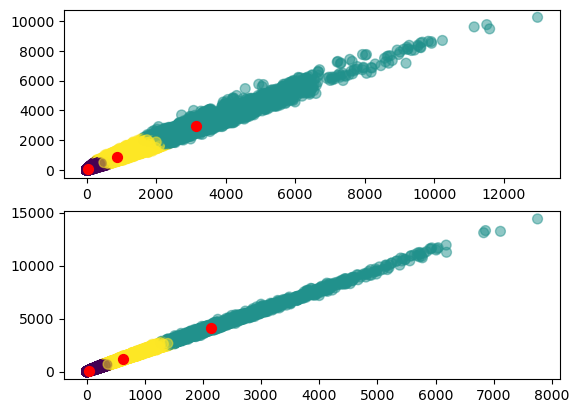

In [3]:
kmeans = KMeans(n_clusters=3, max_iter=300, init='k-means++', tol=0.0001)
kmeans.fit(dataset_test)


kmeans = KMeans(n_clusters=3).fit(dataset_test)
centroids = kmeans.cluster_centers_
print(centroids)
fig, axs = plt.subplots(2)
print(dataset_test['nbkills'].max())

axs[0].scatter(dataset_test['nbkills'], dataset_test['nbdeaths'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[0].scatter(centroids[:, 1], centroids[:, 2], c='red', s=50)

axs[1].scatter(dataset_test['nbwins'], dataset_test['nbpicks'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[1].scatter(centroids[:, 0], centroids[:, 3], c='red', s=50)
plt.show()


#### KPPV sur le win rate et le k/d

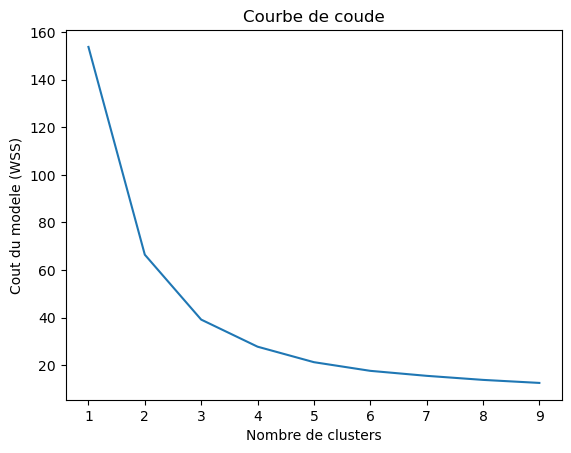

In [4]:
# Chargement du dataset dans une DataFrame
dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# on calcule le w/r
dataset_R6.insert(dataset_R6.shape[1],"w/r", (dataset_R6["nbwins"]/dataset_R6["nbpicks"]), True) 
dataset_R6.drop(columns=["nbwins","nbpicks","role"], inplace=True)

# on calcule le k/d
dataset_R6.loc[dataset_R6['nbdeaths'] == 0] = 1
# on a une ligne qui fait que des 1 partout 
dataset_R6.drop(axis=0, index=dataset_R6[dataset_R6['operator'] == 1].index, inplace=True)
dataset_R6['k/d'] = dataset_R6['nbkills'] / dataset_R6['nbdeaths']


# on merge et enleve les colonnes plateformes et dateid sans perdre les données associées
dataset_R6 = dataset_R6.groupby(['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], as_index=False)[['w/r', 'k/d']].mean()
dataset_R6.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], inplace=True)

dataset = dataset_R6.copy()
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=300, init='k-means++', tol=0.0001)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.title('Courbe de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele (WSS)')
plt.show()


[[0.40658602 0.56669316]
 [0.52242039 1.21802647]
 [0.4734129  0.86386655]]
2.0


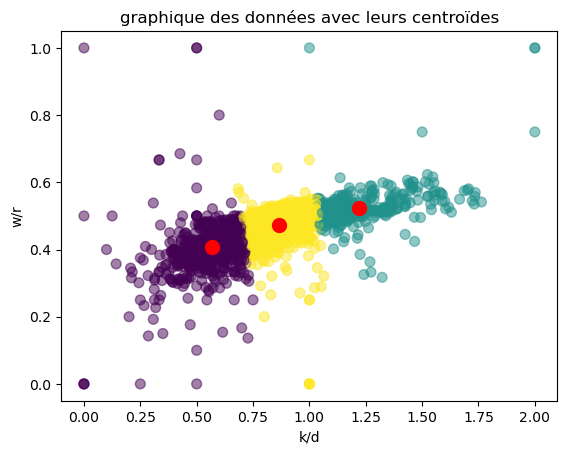

        w/r       k/d
0  0.488266  0.787889
1  0.478773  0.771321
2  0.497415  0.895667
3  0.500830  0.895604
4  0.516301  0.994322


In [5]:
kmeans = KMeans(n_clusters=3, max_iter=300, init='k-means++', tol=0.0001)
kmeans.fit(dataset)


kmeans = KMeans(n_clusters=3).fit(dataset)
centroids = kmeans.cluster_centers_
print(centroids)
print(dataset['k/d'].max())
tab= [0,1,2]
plt.scatter(dataset['k/d'], dataset['w/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=100)

plt.title('graphique des données avec leurs centroïdes')
plt.xlabel('k/d')
plt.ylabel('w/r')
plt.show()
print(dataset.head())

#### KPPV sur les données mais normalisé

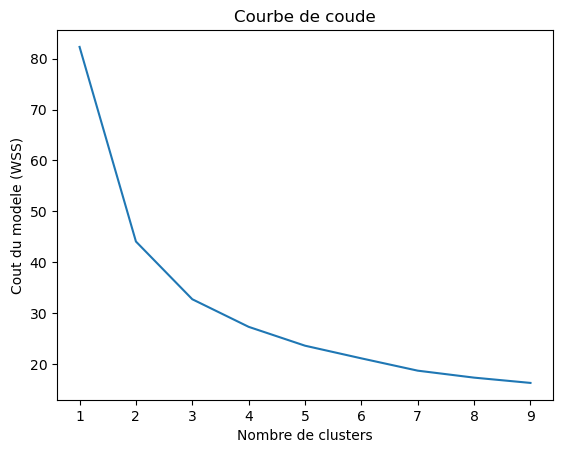

In [6]:
# Chargement du dataset dans une DataFrame
dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# on calcule le w/r
dataset_R6.insert(dataset_R6.shape[1],"w/r", (dataset_R6["nbwins"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"l/r", (1-(dataset_R6["nbwins"]/dataset_R6["nbpicks"])), True)
dataset_R6.insert(dataset_R6.shape[1],"k/r", (dataset_R6["nbkills"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"d/r", (1-(dataset_R6["nbdeaths"]/dataset_R6["nbpicks"])), True) 
dataset_R6.drop(columns=["nbwins","nbpicks","role"], inplace=True)


# on merge et enleve les colonnes plateformes et dateid sans perdre les données associées
dataset_R6 = dataset_R6.groupby(['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], as_index=False)[['w/r', 'l/r','k/r','d/r']].mean()
dataset_R6.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], inplace=True)

dataset = dataset_R6.copy()

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=300, init='k-means++', tol=0.0001)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.title('Courbe de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele (WSS)')
plt.show()

[[0.4417863  0.5582137  0.44416186 0.23286082]
 [0.49335533 0.50664467 0.61897168 0.27649946]
 [0.54459652 0.45540348 0.84248555 0.31857473]]
        w/r       l/r       k/r       d/r
0  0.488266  0.511734  0.560698  0.263240
1  0.478773  0.521227  0.549062  0.258984
2  0.497415  0.502585  0.636416  0.286442
3  0.500830  0.499170  0.638384  0.283096
4  0.516301  0.483699  0.701513  0.281270


[Text(0.5, 0, 'd/r'), Text(0, 0.5, 'l/r')]

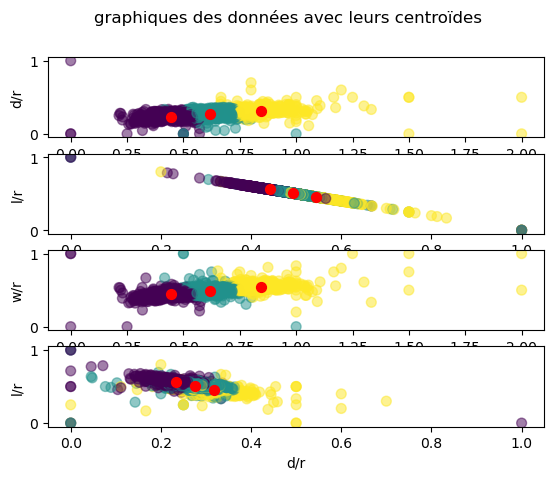

In [7]:
kmeans = KMeans(n_clusters=3, max_iter=300, init='k-means++', tol=0.0001)
kmeans.fit(dataset)


kmeans = KMeans(n_clusters=3).fit(dataset)
centroids = kmeans.cluster_centers_
print(centroids)
print(dataset.head())

fig, axs = plt.subplots(4)
fig.suptitle('graphiques des données avec leurs centroïdes')

axs[0].scatter(dataset['k/r'], dataset['d/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[0].scatter(centroids[:, 2], centroids[:, 3], c='red', s=50)
axs[0].set(xlabel = 'k/r', ylabel ='d/r')


axs[1].scatter(dataset['w/r'], dataset['l/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[1].scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
axs[1].set(xlabel = 'w/r', ylabel ='l/r')

axs[2].scatter(dataset['k/r'], dataset['w/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[2].scatter(centroids[:, 2], centroids[:, 0], c='red', s=50)
axs[2].set(xlabel = 'k/r', ylabel ='w/r')


axs[3].scatter(dataset['d/r'], dataset['l/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[3].scatter(centroids[:, 3], centroids[:, 1], c='red', s=50)
axs[3].set(xlabel = 'd/r', ylabel ='l/r')

#### KPPV sur les données mais normalisé (sans le lose/rate)

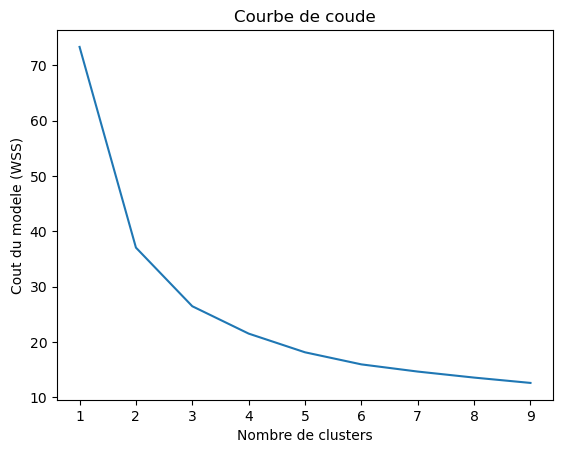

In [8]:
# Chargement du dataset dans une DataFrame
dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# plus de lose rate
dataset_R6.insert(dataset_R6.shape[1],"w/r", (dataset_R6["nbwins"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"k/r", (dataset_R6["nbkills"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"d/r", (1-(dataset_R6["nbdeaths"]/dataset_R6["nbpicks"])), True) 
dataset_R6.drop(columns=["nbwins","nbpicks","role"], inplace=True)


# on merge et enleve les colonnes plateformes et dateid sans perdre les données associées
dataset_R6 = dataset_R6.groupby(['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], as_index=False)[['w/r','k/r','d/r']].mean()
dataset_R6.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], inplace=True)

dataset = dataset_R6.copy()

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=300, init='k-means++', tol=0.0001)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.title('Courbe de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele (WSS)')
plt.show()


        w/r       k/r       d/r
0  0.488266  0.560698  0.263240
1  0.478773  0.549062  0.258984
2  0.497415  0.636416  0.286442
3  0.500830  0.638384  0.283096
4  0.516301  0.701513  0.281270
[[0.4945153  0.62192225 0.2776094 ]
 [0.44418763 0.44593783 0.23423358]
 [0.54168822 0.84747039 0.31688796]]
2.0


[Text(0.5, 0, 'w/r'), Text(0, 0.5, 'd/r')]

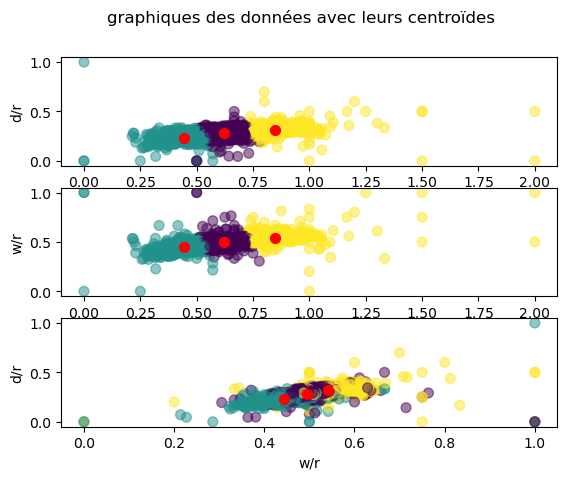

In [9]:
kmeans = KMeans(n_clusters=3, max_iter=300, init='k-means++', tol=0.0001)
kmeans.fit(dataset)


kmeans = KMeans(n_clusters=3).fit(dataset)
centroids = kmeans.cluster_centers_
print(dataset.head())
print(centroids)
print(dataset['k/r'].max())

fig, axs = plt.subplots(3)
fig.suptitle('graphiques des données avec leurs centroïdes')

axs[0].scatter(dataset['k/r'], dataset['d/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[0].scatter(centroids[:, 1], centroids[:, 2], c='red', s=50)
axs[0].set(xlabel = 'k/r', ylabel ='d/r')

axs[1].scatter(dataset['k/r'], dataset['w/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[1].scatter(centroids[:, 1], centroids[:, 0], c='red', s=50)
axs[1].set(xlabel = 'k/r', ylabel ='w/r')

axs[2].scatter(dataset['w/r'], dataset['d/r'],c=kmeans.labels_.astype(float), s=50, alpha=0.5)  
axs[2].scatter(centroids[:, 0], centroids[:, 2], c='red', s=50)
axs[2].set(xlabel = 'w/r', ylabel ='d/r')

In [10]:
data = dataset.copy()

def nombre_aleatoire(minimum, maximum):
    return random.uniform(minimum, maximum)

print(data.shape)

(2151, 3)


In [11]:
def intit_centroide(data, k):
    tab_centroide = []
    for j in range(0, k):
        tab_coord_centroide = []
        for i in range(0, data.shape[1]):
            mu = data.iloc[:, i].mean()
            min = data.iloc[:, i].min()
            max = data.iloc[:, i].max()
            tab_coord_centroide.append(nombre_aleatoire(min, max))
        #print(tab_coord_centroide)
        tab_centroide.append(tab_coord_centroide)
    return np.array(tab_centroide).reshape(-1, 3)

#matrice_centroide = intit_centroide(data, 3)
#print("La matrice avant est \n",matrice_centroide)
#print(matrice_centroide.shape[0])

In [12]:
# Liste des centroide les plus proches de chaque point
def fonc_liste_centroide_le_plus_proche(data, matrice_centroide):
    liste_centroide_le_plus_proche = []
    for i in range(0, data.shape[0]):
        distance_plus_proche = distance.euclidean(data.iloc[i], matrice_centroide[0])
        centroide_le_plus_proche = 0
        for j in range(1, matrice_centroide.shape[0]):
            if distance.euclidean(data.iloc[i], matrice_centroide[j]) < distance_plus_proche:
                distance_plus_proche = distance.euclidean(data.iloc[i], matrice_centroide[j])
                centroide_le_plus_proche = j
        liste_centroide_le_plus_proche.append(centroide_le_plus_proche)
    return liste_centroide_le_plus_proche

#liste_centroide_le_plus_proche = fonc_liste_centroide_le_plus_proche(data, matrice_centroide)
#print("La liste des centroide les plus proches est \n",liste_centroide_le_plus_proche)

In [46]:
def K_Means(data, k, nb_tour=100):
    matrice_centroide = intit_centroide(data, k)

    # Calcule la moyenne des points liés aux centroides
    length, width = matrice_centroide.shape
    liste_centroide_le_plus_proche = fonc_liste_centroide_le_plus_proche(data, matrice_centroide)
    ##print("la matrice est \n",matrice_centroide.shape)
    nb_centroide = 1
    mat2 = []
    cpt = 0
    #print("matrice avant func :\n",matrice_centroide)
    while((np.array_equal(matrice_centroide, mat2) == False) and (cpt < nb_tour)):
        cpt += 1
        mat2 = matrice_centroide.copy()
        for i in range(0,length):
            for j in range(0, len(liste_centroide_le_plus_proche)):
                if(liste_centroide_le_plus_proche[j]==i):
                    nb_centroide += 1
                    matrice_centroide[i] += data.iloc[j]
            matrice_centroide[i] = matrice_centroide[i]/nb_centroide
            nb_centroide = 1
        #print("matrice mat2 :\n",mat2)
        #print("matrice complete :\n",matrice_centroide)
        liste_centroide_le_plus_proche = fonc_liste_centroide_le_plus_proche(data, matrice_centroide)
        if(cpt%10 == 0):
            print("Nombre de tour =",cpt)

    print("Nombre de tour =",cpt)
    return liste_centroide_le_plus_proche, matrice_centroide

#liste_centroide_le_plus_proche,matrice_centroide = K_Means(data, k=3)

Nombre de tour = 27


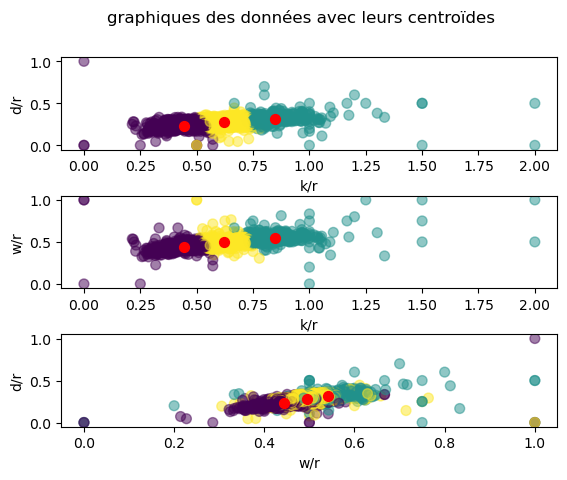

In [43]:
liste_centroide_le_plus_proche,matrice_centroide = K_Means(data, k=3)

fig, axs = plt.subplots(3)
fig.suptitle('graphiques des données avec leurs centroïdes')

axs[0].scatter(dataset['k/r'], dataset['d/r'],c=liste_centroide_le_plus_proche, s=50, alpha=0.5)  
axs[0].scatter(centroids[:, 1], centroids[:, 2], c='red', s=50)
axs[0].set(xlabel = 'k/r', ylabel ='d/r')

axs[1].scatter(dataset['k/r'], dataset['w/r'],c=liste_centroide_le_plus_proche, s=50, alpha=0.5)  
axs[1].scatter(centroids[:, 1], centroids[:, 0], c='red', s=50)
axs[1].set(xlabel = 'k/r', ylabel ='w/r')

axs[2].scatter(dataset['w/r'], dataset['d/r'],c=liste_centroide_le_plus_proche, s=50, alpha=0.5)  
axs[2].scatter(centroids[:, 0], centroids[:, 2], c='red', s=50)
axs[2].set(xlabel = 'w/r', ylabel ='d/r')

plt.subplots_adjust(hspace=0.5)

In [20]:
#calcul de l'inertie
def calculate_inertia(data, k):
    liste_centroide_le_plus_proche, matrice_centroide = K_Means(data, k)
    inertia = 0
    for i in range(0, data.shape[0]):
        inertia += distance.euclidean(data.iloc[i], matrice_centroide[liste_centroide_le_plus_proche[i]])
    return inertia

print("L'inertie est de : ",calculate_inertia(data, 3))

L'inertie est de :  1314.3979132252834


Nombre de tour = 7
tour : 1
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 22
tour : 2
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 22
tour : 3
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 30
Nombre de tour = 35
tour : 4
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 30
Nombre de tour = 32
tour : 5
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 30
Nombre de tour = 40
Nombre de tour = 49
tour : 6
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 30
Nombre de tour = 40
Nombre de tour = 50
Nombre de tour = 58
tour : 7
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 30
Nombre de tour = 40
Nombre de tour = 50
Nombre de tour = 54
tour : 8
Nombre de tour = 10
Nombre de tour = 20
Nombre de tour = 30
Nombre de tour = 40
Nombre de tour = 50
Nombre de tour = 60
Nombre de tour = 70
Nombre de tour = 80
Nombre de tour = 90
Nombre de tour = 100
Nombre de tour = 100
tour : 9
[309.009571239597, 215.91763833724954, 209.63061798984768,

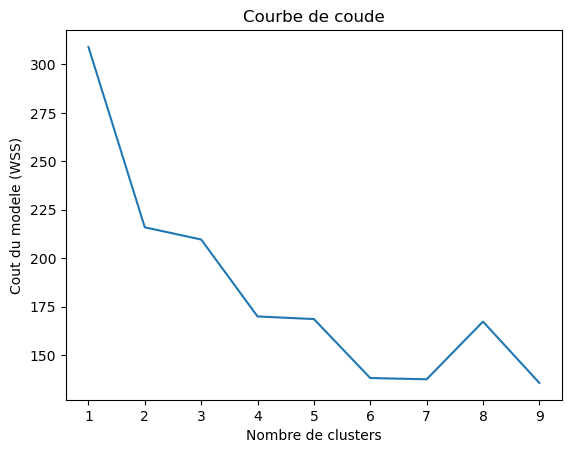

In [48]:
#affichage de la courbe de coude
inertia = []
for k in range(1, 10):
    inertia.append(calculate_inertia(data, k))
    print("tour :",k)
print(inertia)
plt.plot(range(1, 10), inertia)
plt.title('Courbe de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele (WSS)')
plt.show()
